In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

In [3]:
df = pd.read_csv('data.csv')
df.head()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.result,verification.time
0,0,0,2,1,59,1,0,False,163.32
1,0,0,2,1,59,2,0,False,200.86
2,0,0,2,1,59,4,0,False,154.89
3,0,0,2,1,59,6,0,False,108.64
4,0,0,2,1,60,1,0,True,85.47


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2043 entries, 0 to 2042
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   process.b1.capacity  2043 non-null   int64  
 1   process.b2.capacity  2043 non-null   int64  
 2   process.b3.capacity  2043 non-null   int64  
 3   process.b4.capacity  2043 non-null   int64  
 4   property.price       2043 non-null   int64  
 5   property.product     2043 non-null   int64  
 6   property.winner      2043 non-null   int64  
 7   verification.result  2043 non-null   bool   
 8   verification.time    2043 non-null   float64
dtypes: bool(1), float64(1), int64(7)
memory usage: 129.8 KB


In [5]:
df.isnull().sum()

process.b1.capacity    0
process.b2.capacity    0
process.b3.capacity    0
process.b4.capacity    0
property.price         0
property.product       0
property.winner        0
verification.result    0
verification.time      0
dtype: int64

In [6]:
df.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.00,2043.00,2043.00,2043.00,2043.00,2043.00,2043.00,2043.00
mean,1.00,2.09,1.88,0.59,71.47,3.25,0.46,7336.94
std,0.82,0.81,0.32,0.49,8.05,1.80,1.06,10375.39
min,0.00,0.00,1.00,0.00,59.00,1.00,0.00,77.92
25%,0.00,1.00,2.00,0.00,65.00,2.00,0.00,546.82
50%,1.00,2.00,2.00,1.00,70.00,3.00,0.00,1316.98
75%,2.00,3.00,2.00,1.00,78.00,5.00,0.00,10876.64
max,2.00,3.00,2.00,1.00,90.00,6.00,4.00,44130.52


In [7]:
df.describe()

,process.b1.capacity,process.b2.capacity,process.b3.capacity,process.b4.capacity,property.price,property.product,property.winner,verification.time
count,2043.00,2043.00,2043.00,2043.00,2043.00,2043.00,2043.00,2043.00
mean,1.00,2.09,1.88,0.59,71.47,3.25,0.46,7336.94
std,0.82,0.81,0.32,0.49,8.05,1.80,1.06,10375.39
min,0.00,0.00,1.00,0.00,59.00,1.00,0.00,77.92
25%,0.00,1.00,2.00,0.00,65.00,2.00,0.00,546.82
50%,1.00,2.00,2.00,1.00,70.00,3.00,0.00,1316.98
75%,2.00,3.00,2.00,1.00,78.00,5.00,0.00,10876.64
max,2.00,3.00,2.00,1.00,90.00,6.00,4.00,44130.52


In [8]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

if len(categorical_columns) > 0:
    print("Категоріальні фічі у вашому DataFrame:")
    print(categorical_columns)
else:
    print("В вашому DataFrame немає категоріальних фіч.")


В вашому DataFrame немає категоріальних фіч.


In [9]:
columns_to_drop = ['verification.result', 'verification.time']
X = df.drop(columns=columns_to_drop)
X.shape

(2043, 7)

In [10]:
y = df['verification.result'].values
y.shape

(2043,)

<Axes: >

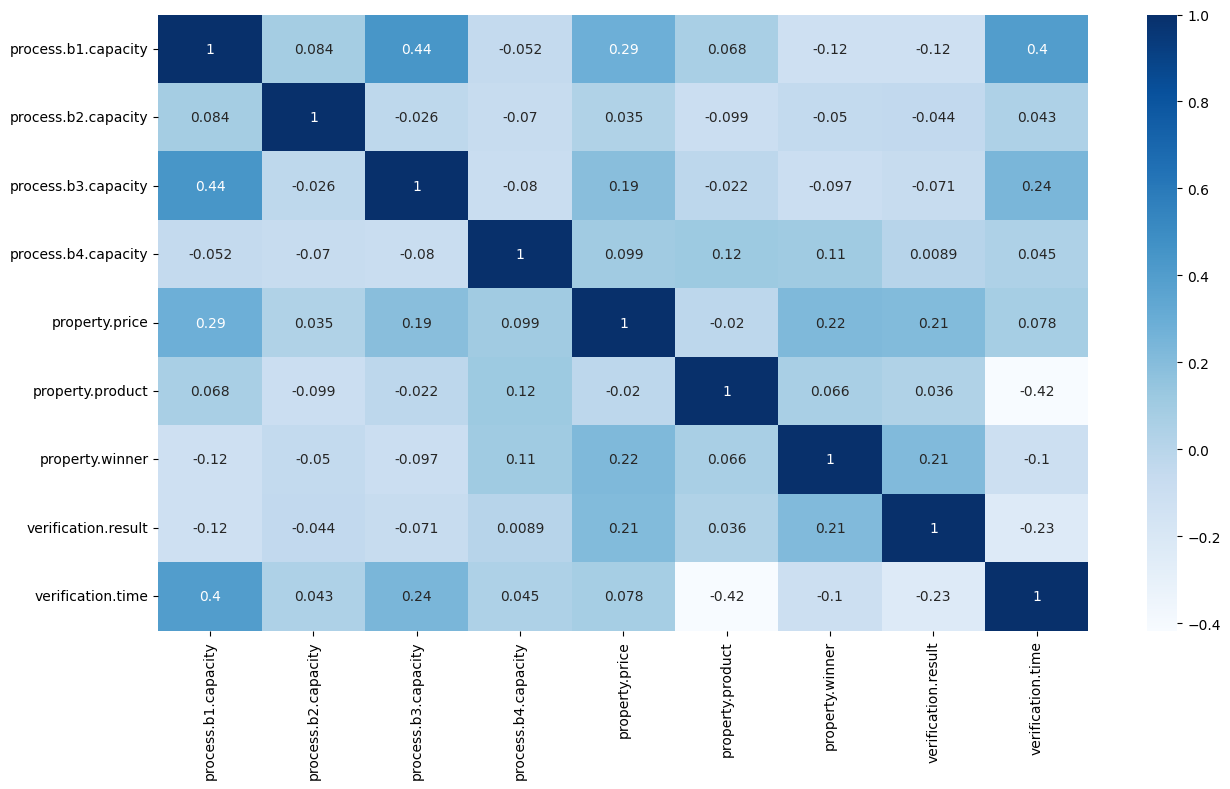

In [11]:
sns.heatmap(df.corr(), annot = True, cmap = 'Blues')

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [17]:
scaler = StandardScaler()
scaler.fit(x_train)
X_train = scaler.transform(x_train)
X_test = scaler.transform(x_test)

In [22]:
def evaluate(model, X_test, y_test):
    y_test_pred = model.predict(X_test)

    print("TESTING RESULTS: \n===============================")
    clf_report = pd.DataFrame(classification_report(y_test, y_test_pred, output_dict=True))
    print(f"CONFUSION MATRIX:\n{confusion_matrix(y_test, y_test_pred)}")
    print(f"ACCURACY SCORE:\n{accuracy_score(y_test, y_test_pred):.4f}")
    print(f"CLASSIFICATION REPORT:\n{clf_report}")

In [23]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier()
bagging_clf = BaggingClassifier(base_estimator=tree, n_estimators=1500, random_state=42)
bagging_clf.fit(X_train, y_train)

evaluate(bagging_clf, X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


TESTING RESULTS: 
CONFUSION MATRIX:
[[538   1]
 [  0  74]]
ACCURACY SCORE:
0.9984
CLASSIFICATION REPORT:
           False  True  accuracy  macro avg  weighted avg
precision   1.00  0.99      1.00       0.99          1.00
recall      1.00  1.00      1.00       1.00          1.00
f1-score    1.00  0.99      1.00       1.00          1.00
support   539.00 74.00      1.00     613.00        613.00


In [24]:
from sklearn.ensemble import AdaBoostClassifier

ada_boost_clf = AdaBoostClassifier(n_estimators=30)
ada_boost_clf.fit(X_train, y_train)
evaluate(ada_boost_clf, X_test, y_test)

TESTING RESULTS: 
CONFUSION MATRIX:
[[535   4]
 [ 35  39]]
ACCURACY SCORE:
0.9364
CLASSIFICATION REPORT:
           False  True  accuracy  macro avg  weighted avg
precision   0.94  0.91      0.94       0.92          0.93
recall      0.99  0.53      0.94       0.76          0.94
f1-score    0.96  0.67      0.94       0.82          0.93
support   539.00 74.00      0.94     613.00        613.00


In [29]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
stack = StackingClassifier(estimators=[('rf', ada_boost_clf), ('gb', bagging_clf)], final_estimator=LogisticRegression())
stack.fit(X_train, y_train)
evaluate(stack, X_test, y_test)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/

TESTING RESULTS: 
CONFUSION MATRIX:
[[538   1]
 [  0  74]]
ACCURACY SCORE:
0.9984
CLASSIFICATION REPORT:
           False  True  accuracy  macro avg  weighted avg
precision   1.00  0.99      1.00       0.99          1.00
recall      1.00  1.00      1.00       1.00          1.00
f1-score    1.00  0.99      1.00       1.00          1.00
support   539.00 74.00      1.00     613.00        613.00


Accuracy:
    1. Bagging: 0.9984
    2. Boosting: 0.9364
    3. Stacking: 0.9984